In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import interpolate

In [3]:

df_medida = pd.read_excel('Simul X Medidas\Sierpinski_Half_v4\Sierpinski_v4.xlsx', 'Medida', decimal=',')
df_medida.dtypes
df_medida.rename(columns = {'Frequency': 'freq', ' Formatted Data':'S11_MeasSKY'}, inplace = True)

df_medida['freq'] = df_medida['freq'].astype(float)


df_medida.dtypes

freq           float64
S11_MeasSKY    float64
dtype: object

In [6]:
df_medida = pd.read_excel('Simul X Medidas\Sierpinski_Half_v4\Sierpinski_v4.xlsx', 'INPE', decimal=',')
df_medida.dtypes
df_medida.rename(columns = {'Frequency (Hz)': 'freq', 'dB':'S11_MeasINPE'}, inplace = True)

# df_medida['freq'] = df_medida['freq'].astype(float)


df_medida.dtypes

freq              int64
S11_MeasINPE    float64
dtype: object

In [7]:
df_ads = pd.read_excel('Simul X Medidas\Sierpinski_Half_v4\Sierpinski_v4.xlsx', 'ADS', decimal=',')
df_ads.dtypes
df_ads.rename(columns = {'Frequency / GHz':'freq', 'dB(S11_fitted)':'S11_ADS'}, inplace = True)

# df_ads['freq'] = round(df_cst['freq'],2)*10**9
df_ads.dtypes
# df_ads['S11_ADS']

freq       float64
S11_ADS    float64
dtype: object

In [8]:
df_cst = pd.read_excel('Simul X Medidas\Sierpinski_Half_v4\Sierpinski_v4.xlsx', 'CST', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency':'freq', 'S1;1':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst['freq']

0       1.000000e+08
1       1.200000e+08
2       1.400000e+08
3       1.500000e+08
4       1.700000e+08
            ...     
996     1.793000e+10
997     1.795000e+10
998     1.796000e+10
999     1.798000e+10
1000    1.800000e+10
Name: freq, Length: 1001, dtype: float64

In [9]:
df_medida2 = pd.read_excel('Simul X Medidas\Sierpinski_Half_v4\Sierpinski_v4.xlsx', 'USP1', decimal=',')
df_medida2.dtypes
df_medida2.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP1'}, inplace = True)
df_medida2 = df_medida2.drop(['R'], axis= 1)

df_medida2['freq'] = df_medida2['freq'].astype(float)


df_medida2.dtypes

freq            float64
S11_MeasUSP1    float64
dtype: object

In [10]:
df_medida3 = pd.read_excel('Simul X Medidas\Sierpinski_Half_v4\Sierpinski_v4.xlsx', 'USP2', decimal=',')
df_medida3.dtypes
df_medida3.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP2'}, inplace = True)
df_medida3 = df_medida3.drop(['R'], axis= 1)

df_medida3['freq'] = df_medida3['freq'].astype(float)


df_medida3.dtypes

freq            float64
S11_MeasUSP2    float64
dtype: object

In [11]:
df_medida4 = pd.read_excel('Simul X Medidas\Sierpinski_Half_v4\Sierpinski_v4.xlsx', 'USP3', decimal=',')
df_medida4.dtypes
df_medida4.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP3'}, inplace = True)
df_medida4 = df_medida4.drop(['R'], axis= 1)

df_medida4['freq'] = df_medida4['freq'].astype(float)


df_medida4.dtypes

freq            float64
S11_MeasUSP3    float64
dtype: object

In [12]:
# df = pd.merge_ordered(df_cst, df_ads, on='freq')

df1 = df_ads.merge(df_cst, how= 'outer', on='freq')
df = df1.merge(df_medida, how= 'outer', on='freq')
df.sort_values(by='freq', inplace=True)

# df= df.loc[df['freq']<=15e9]

df

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,freq,S11_ADS,S11_CST,S11_MeasINPE
0,0.000000e+00,-3.182281e-14,NaN,NaN
1,8.274252e+00,-4.435906e-14,NaN,NaN
2,8.274252e+01,-7.328889e-14,NaN,NaN
3,8.274252e+02,-1.205409e-12,NaN,NaN
4,8.274252e+03,-1.158485e-10,NaN,NaN
...,...,...,...,...
15694,1.799600e+10,NaN,NaN,-5.518620
15695,1.799700e+10,NaN,NaN,-5.521069
15696,1.799800e+10,NaN,NaN,-5.541224
15697,1.799900e+10,NaN,NaN,-5.524965


In [13]:
nfreq = np.arange(3E9, 18E9, 10E6) # % desejada

f= interpolate.interp1d(df_ads['freq'], df_ads['S11_ADS'])

y_ads = f(nfreq)

y_ads

array([-3.64790018, -3.70225   , -3.75671225, ..., -5.22571528,
       -5.25291797, -5.28012066])

In [14]:
f= interpolate.interp1d(df_cst['freq'], df_cst['S11_CST'])

y_cst = f(nfreq)

y_cst

array([-2.7046966 , -2.74243475, -2.7801729 , ..., -7.8232436 ,
       -7.8663908 , -7.90902245])

In [15]:
f= interpolate.interp1d(df_medida['freq'], df_medida['S11_MeasINPE'])

y_med1 = f(nfreq)

y_med1

array([-1.078093, -1.092551, -1.093247, ..., -5.364766, -5.432005,
       -5.491497])

In [16]:
f= interpolate.interp1d(df_medida2['freq'], df_medida2['S11_MeasUSP1'])

y_med2 = f(nfreq)

y_med2

array([-1.28890732, -1.30338085, -1.31437549, ..., -5.52045534,
       -5.53305568, -5.54893504])

In [17]:
f= interpolate.interp1d(df_medida3['freq'], df_medida3['S11_MeasUSP2'])

y_med3 = f(nfreq)

y_med3

array([-1.35831133, -1.35325446, -1.35558254, ..., -5.8450813 ,
       -5.8705652 , -5.88891736])

In [18]:
f= interpolate.interp1d(df_medida4['freq'], df_medida4['S11_MeasUSP3'])

y_med4 = f(nfreq)

y_med4

array([-1.65541569, -1.72339675, -1.7727466 , ..., -5.87711689,
       -5.88845774, -5.89891056])

In [19]:
# d= {'freq': nfreq, 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_MeasSKY':y_med1,'S11_MeasUSP1':y_med2, 'S11_MeasUSP2':y_med3, 'S11_MeasUSP3':y_med4}

d= { 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_MeasINPE':y_med1, 'S11_MeasUSP3':y_med4}

df = pd.DataFrame(d)
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')
corr_spearman = df.corr(method='spearman')

corr_pearson

,S11_ADS,S11_CST,S11_MeasINPE,S11_MeasUSP3
S11_ADS,1.000000,0.597111,0.661016,0.688516
S11_CST,0.597111,1.000000,0.929930,0.944757
S11_MeasINPE,0.661016,0.929930,1.000000,0.983594
S11_MeasUSP3,0.688516,0.944757,0.983594,1.000000


<Figure size 4500x3600 with 0 Axes>

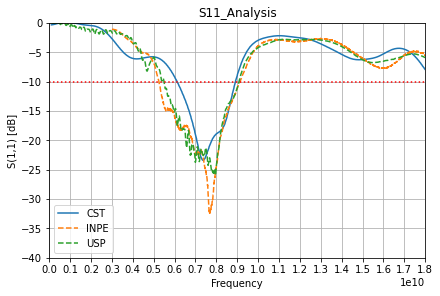

In [20]:
highest_freq = max([max(df_cst['freq']),max(df_ads['freq'])])


figure(figsize=(15, 12), dpi=300)
fig, ax = plt.subplots( layout = 'constrained')
# ax.plot(df_ads['freq'], df_ads['S11_ADS'], label ='ADS')
ax.plot(df_cst['freq'], df_cst['S11_CST'], label ='CST')
ax.plot(df_medida['freq'], df_medida['S11_MeasINPE'], '--',label ='INPE',)
# ax.plot(df_medida2['freq'], df_medida2['S11_Meas2'], label ='Medida 2')
ax.plot(df_medida4['freq'], df_medida4['S11_MeasUSP3'],'--', label ='USP')

plt.axhline(y=-10, ls=':', c='r') #Horizontal Line
plt.xticks(range(0, 19*10**9, 1*10**9)) #x scale
ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, highest_freq), ylim=(-40, 0))
ax.grid()

ax.legend()

In [11]:
import pandas as pd

df_cst = pd.read_excel('Simul X Medidas\Sierpinski_Half_v4\Sierpinski_v4.xlsx', 'CST_26G5', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency / GHz':'freq', 'S1,1':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst['freq']

0       1.000000e+08
1       1.300000e+08
2       1.500000e+08
3       1.800000e+08
4       2.100000e+08
            ...     
996     2.639000e+10
997     2.642000e+10
998     2.645000e+10
999     2.647000e+10
1000    2.650000e+10
Name: freq, Length: 1001, dtype: float64

In [5]:
df_medida2 = pd.read_excel('Simul X Medidas\Sierpinski_Half_v4\Sierpinski_v4.xlsx', 'USP_26G5', decimal=',')
df_medida2.dtypes
df_medida2.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP1'}, inplace = True)


df_medida2['freq'] = df_medida2['freq'].astype(float)


df_medida2.dtypes

freq            float64
S11_MeasUSP1    float64
dtype: object

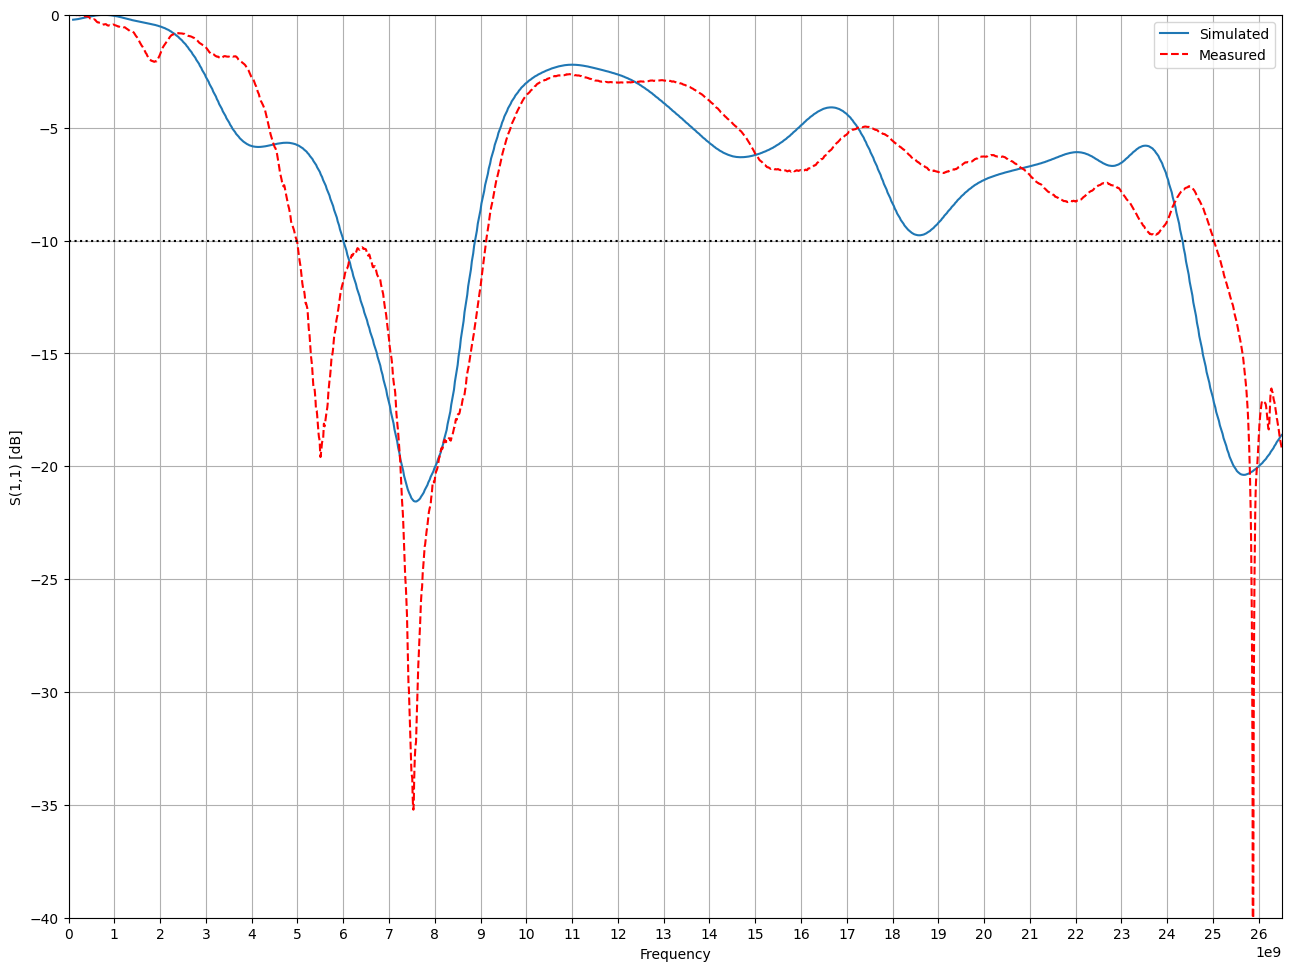

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( layout = 'constrained', figsize=(6.4*2,4.8*2))
# ax.plot(df_ads['freq'], df_ads['S11_ADS'], label ='ADS')
ax.plot(df_cst['freq'], df_cst['S11_CST'], label ='Simulated')
# ax.plot(nfreq, y, label ='Med1_inter')
ax.plot(df_medida2['freq'], df_medida2['S11_MeasUSP1'], '--',label ='Measured', color = 'red')
# ax.plot(df_medida2['freq'], df_medida2['S11_MeasSKY2'], label ='SKY 2')
# ax.plot(df_medida3['freq'], df_medida3['S11_MeasUSP1'], '--',label ='USP 1',)
# ax.plot(df_medida4['freq'], df_medida4['S11_MeasUSP2'],'--', label ='USP')


plt.axhline(y=-10, ls=':', c='#000000') #Horizontal Line
plt.ticklabel_format(axis='x', style='sci', scilimits=(9,9))
plt.xticks(range(0, 27*10**9, 1*10**9)) #x scale
ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
# ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, 26.5*10**9), ylim=(-40, 0))
ax.grid()
ax.legend()